# Preditor Linear Ótimo
## Processo média móvel

Considere o processo média móvel

$Y[n] = \frac{X[n] + X[n-1] + X[n-2]}{3}$

em que $X[n]$ é um processo ruído gaussiano branco com variância $\sigma_X^2$. Apesar de $X[n]$ ser descorrelacionado $Y[n]$ é um processo correlacionado.

Vamos projetar e simular um filtro preditor linear ótimo  para $Y[n+1]$ dado $Y[n]$, $Y[n-1]$ e $Y[n-2]$ e estimar o erro quadrático médio.

ou seja,

$\hat{Y}[n+1] = h[0]Y[n] + h[1]Y[n-1] + h[2]Y[n-2] = \sum_{k=0}^2 h[k]Y[n-k]$

## Cálculo dos parâmetros do preditor

Os parâmetros do filtro linear preditor ótimo podem ser calculados da seguinte forma

$R_Y(m+1) = \sum_{k=0}^2 h[k]R_Y[m-k], \quad m=0,1,2.$

temos um sistema linear 

$\begin{bmatrix} R_Y[1] \\ R_Y[2] \\ R_Y[3] \end{bmatrix} = \begin{bmatrix} R_Y[0] & R_Y[-1] & R_Y[-2] \\ R_Y[1] & R_Y[0] & R_Y[-1] \\ R_Y[2] & R_Y[1] & R_Y[0]  \end{bmatrix} \begin{bmatrix} h[0] \\ h[1] \\ h[2] \end{bmatrix}$

### Calculando $R_Y[k]$

$R_Y[n,n+k] = EY[n]Y[n+k]$ substituindo $Y[n]$ e $Y[n+k]$ e depois de alguns algebrismos

$R_Y[k] = (1/9)(3R_X[k] + 2R_X[k-1] + 2R_X[k+1] + R_X[k-2] + R_X[k+2])$ com $R_X[k] = \sigma_X^2 \delta_k$

Assim 

$R_Y[k] = \begin{cases} (1/3)\sigma_X^2 & k=0 \\ (2/9)\sigma_X^2 & |k|=1 \\ (1/9)\sigma_X^2 & |k|=2 \\ 0 & |k| \ge 3 \end{cases}$

Podemos calcular a precicabilidade de $Y[n+1]$ por seus coeficientes de correlação por

$\rho[k] = R_Y[k]/R_Y[0]$

In [1]:
"""
@author: albert
IQuanta - DEE - UFCG
Data: agosto 2022
Versão: 1.0
"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

# Cálculo dos coeficientes de correlação

rho = np.array([1, (2/9)/(1/3), (1/9)/(1/3)])

print("[rho[0], rho[1], rho[2]] = ", rho)

[rho[0], rho[1], rho[2]] =  [1.         0.66666667 0.33333333]


Observe que $\rho[1] = 0,6667$ é um coeficiente de correlação razoável que deve produzir ainda bons resultados do preditor. $\rho[k] = 0$ para $|k| \ge 3$, indicando que $Y[n]$ e $Y[n \pm k]$ são descorrelacionados quando $|k| \ge 3$.

Substituindo os valores na matriz, temos

$\begin{bmatrix} 2/9 \\ 1/9 \\ 0 \end{bmatrix} = \begin{bmatrix} 1/3 & 2/9 & 1/9 \\ 2/9 & 1/3 & 2/9 \\ 1/9 & 2/9 & 1/3  \end{bmatrix} \begin{bmatrix} h[0] \\ h[1] \\ h[2] \end{bmatrix}$

Resolvendo para $h[k]$

In [2]:
# Cáculo dos coeficientes h[0], h[1] e h[2]

RY123 = np.array([2/9, 1/9, 0])    # [RY[1] RY[2] RY[3]] = [2/9 1/9 0]

RY = np.array([[1/3, 2/9, 1/9],[2/9, 1/3, 2/9],[1/9, 2/9, 1/3]])

h = np.linalg.solve(RY, RY123)

print("[h[0], h[1], h[2]] = ", h)

[h[0], h[1], h[2]] =  [ 7.50000000e-01  8.18789481e-17 -2.50000000e-01]


## Simulação

Vamos gerar 100 amostras de $Y[n]$ e estimando $Y[n+1]$ usando o preditor $\hat{Y}[n+1]$

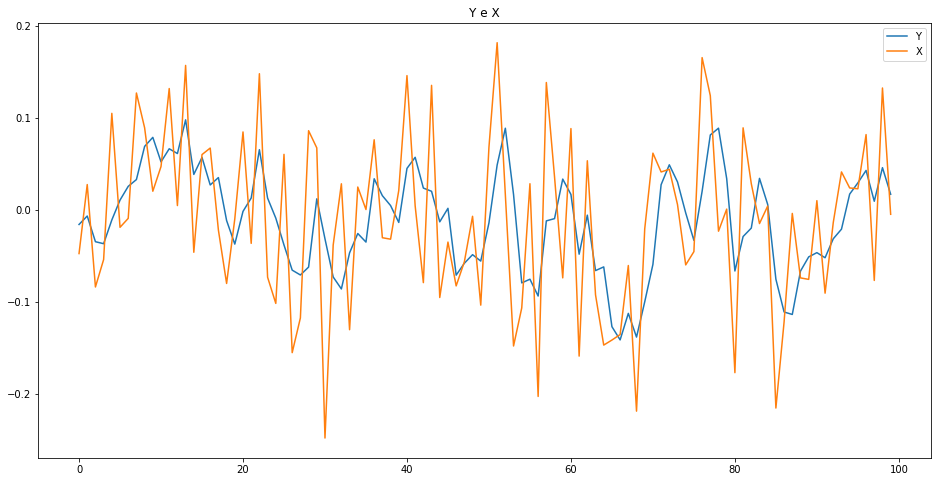

In [3]:
Na = 100    # número de amostras

# gera X[n] ruído gaussiano branco com variância sigma2

sigma = 0.1  # desvio padrão de X[n]
X = np.random.normal(0, sigma, Na)

# gera Y[n] = (X[n] + X[n-1] + X[n-2])/3

Y = np.zeros(Na)
Y[0] = X[0]/3             # Y[0] = X[0]/3, X[k] = 0 para k < 0
Y[1] = (X[0] + X[1])/3 # Y[1] = (X[1] + X[0])/3,

for i in range(2,Na):
    Y[i] = (X[i] + X[i-1] + X[i-2])/3
    
n = np.arange(0,Na,1)
plt.figure(figsize=(16, 8))
plt.plot(n,Y,label='Y')
plt.plot(n,X,label='X')
plt.legend()
plt.title('Y e X')
#   plt.ylabel('Freq. Relativa')
#   plt.xlabel('n')
plt.show()

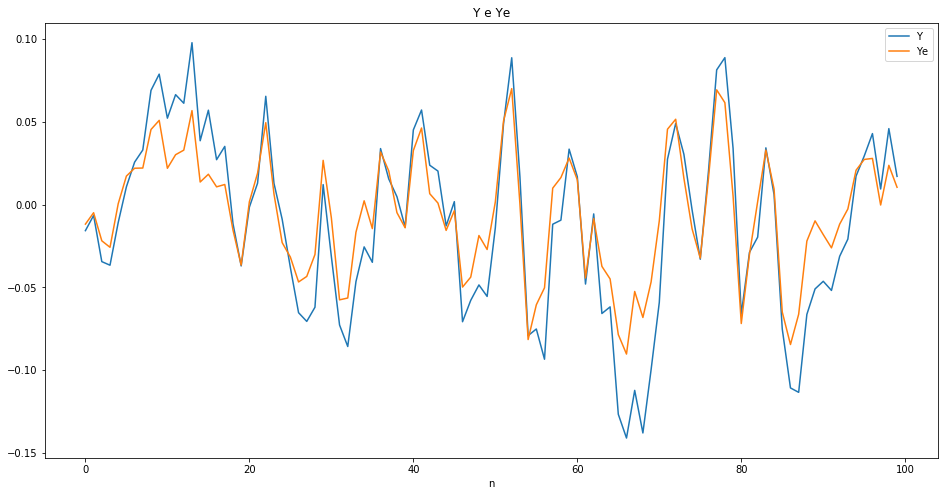

In [4]:
# usando o preditor
Ye = np.zeros(Na)   # Ŷ[n+1] = 1,125Y[n] - 1,5Y[n-1] + 1,625Y[n-2]
Ye[0] = h[0]*Y[0]
Ye[1] = (h[0]*Y[1] - h[1]*Y[0])
for i in range(2,Na):
    Ye[i] = (h[0]*Y[i] - h[1]*Y[i-1] + h[2]*Y[i-2])

plt.figure(figsize=(16, 8))
plt.plot(n,Y,label='Y')
plt.plot(n,Ye,label='Ye')
plt.legend()
plt.title('Y e Ye')
#   plt.ylabel('Freq. Relativa')
plt.xlabel('n')
plt.show()     

## Erro quadrático médio

O valor teórico do erro quadrático médio, $E[e²]$ é determinado por

$E[e^2] = R_Y[0] - \sum_{k=0}^2 h[k]R_Y[k-1] = [(1/3) - h[0](2/9) - h[1](1/3) - h[2](2/9)]\sigma_X^2$

O valor estimado na simulação será

In [5]:
# cálculo do erro
erro = Y - Ye

erroq = erro**2    # erro quadrático

Eerroq = sum(erroq)/Na # média amostral do erro quadrático

Eerroq_teorico = (1/3 - h[0]*(2/9) - h[1]*(1/3) - h[2]*(2/9))*sigma**2

print("Estimativa do erro quadrático médio = ", Eerroq)
print("Valor teórico = ", Eerroq_teorico)

Estimativa do erro quadrático médio =  0.0005606374792252178
Valor teórico =  0.0022222222222222227
